<a href="https://colab.research.google.com/github/mdshah29/carplate_recognization/blob/main/CarPlateRecognisation_CNN_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
import cv2
import tensorflow as tf
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

Accessing My Google Drive for Cars_cnn Data Images & annotations 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


*  Resizing 433 car images to 200*200..

In [3]:
# resize the image
IMAGE_RESIZE_X = 200
IMAGE_RESIZE_Y = 200

In [4]:
car_folder_path = '/content/gdrive/MyDrive/car_cnn/images'
car_image_name_list = list()
for car_image in os.listdir(car_folder_path):
    full_path = os.path.join(car_folder_path, car_image)
    car_image_name_list.append(full_path)

# sort the cars by their index in ascending order
car_image_name_list = sorted(car_image_name_list, key=lambda x: int(x.split('/')[-1].split('.')[0][4:]))

print (car_image_name_list)

['/content/gdrive/MyDrive/car_cnn/images/Cars0.png', '/content/gdrive/MyDrive/car_cnn/images/Cars1.png', '/content/gdrive/MyDrive/car_cnn/images/Cars2.png', '/content/gdrive/MyDrive/car_cnn/images/Cars3.png', '/content/gdrive/MyDrive/car_cnn/images/Cars4.png', '/content/gdrive/MyDrive/car_cnn/images/Cars5.png', '/content/gdrive/MyDrive/car_cnn/images/Cars6.png', '/content/gdrive/MyDrive/car_cnn/images/Cars7.png', '/content/gdrive/MyDrive/car_cnn/images/Cars8.png', '/content/gdrive/MyDrive/car_cnn/images/Cars9.png', '/content/gdrive/MyDrive/car_cnn/images/Cars10.png', '/content/gdrive/MyDrive/car_cnn/images/Cars11.png', '/content/gdrive/MyDrive/car_cnn/images/Cars12.png', '/content/gdrive/MyDrive/car_cnn/images/Cars13.png', '/content/gdrive/MyDrive/car_cnn/images/Cars14.png', '/content/gdrive/MyDrive/car_cnn/images/Cars15.png', '/content/gdrive/MyDrive/car_cnn/images/Cars16.png', '/content/gdrive/MyDrive/car_cnn/images/Cars17.png', '/content/gdrive/MyDrive/car_cnn/images/Cars18.png', '/

* Resize

In [5]:
# read in car images and resize
resized_car_images_list = list()    
for full_path in car_image_name_list:
    car_image = cv2.imread(full_path)
    car_resize_image = cv2.resize(car_image, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))
    resized_car_images_list.append(np.array(car_resize_image))

print('Read in {} resized car images'.format(len(resized_car_images_list)))

Read in 433 resized car images


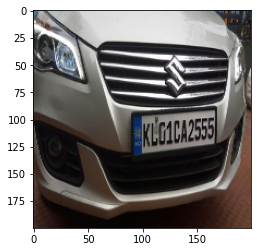

In [6]:
plt.imshow(cv2.cvtColor(resized_car_images_list[0], cv2.COLOR_BGR2RGB))

* Contour detection and drawing using different extraction modes to complement 
the understanding of hierarchies

* Trying pre-processing techniques – thresholding , gaussian blur and findcountor etc ..

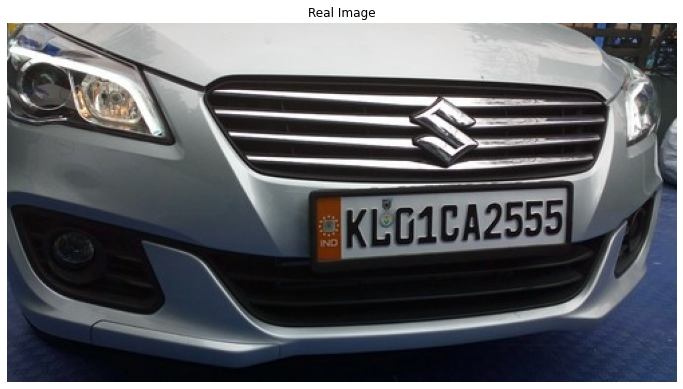

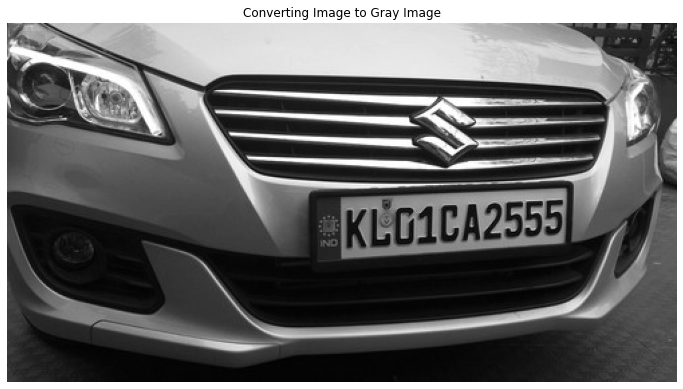

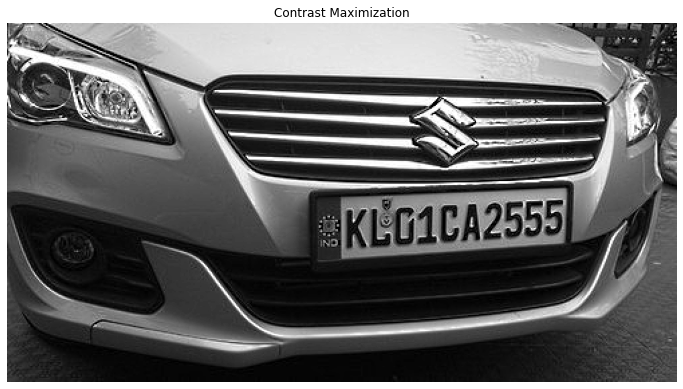

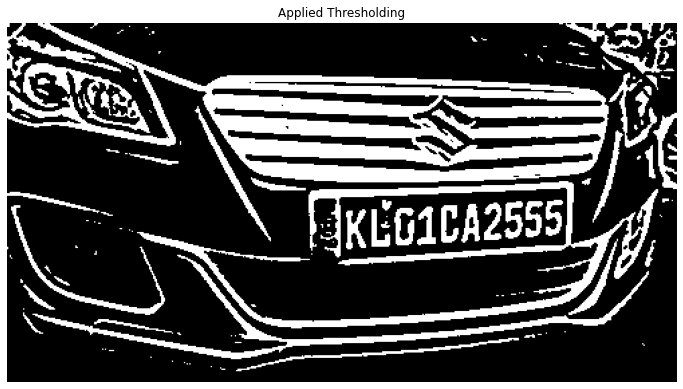

In [7]:
from google.colab.patches import cv2_imshow

image2 = cv2.imread('/content/gdrive/MyDrive/car_cnn/images/Cars0.png')

height, width, channel = image2.shape

plt.figure(figsize=(12, 10))
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.savefig('Car.png',bbox_inches = 'tight')
plt.title('Real Image')
plt.show()

# Converting Image into Gray Scale Image 

gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.savefig('Car-GrayScale.png',bbox_inches = 'tight')
plt.title('Converting Image to Gray Image')
plt.show()

# Maximize the Contrast 
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.savefig('Car-Contrast.png',bbox_inches = 'tight')
plt.title('Contrast Maximization')
plt.show()


# Adaptive Thresholding 

img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')
plt.axis('off')
plt.savefig('Car-Adaptive-Thresholding.png',bbox_inches = 'tight')
plt.title('Applied Thresholding')
plt.show()

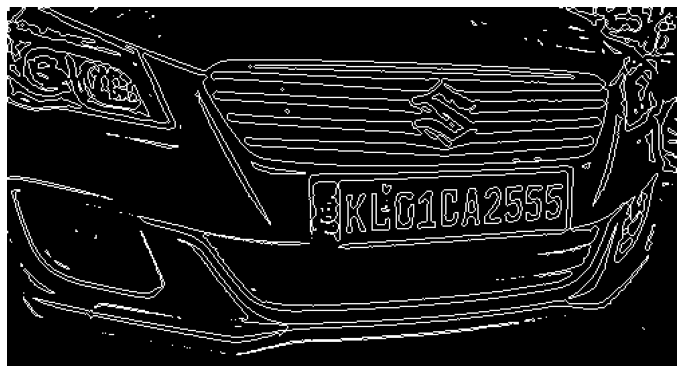

In [8]:
# Find contour 
contours, _= cv2.findContours(
    img_thresh, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)
plt.axis('off')
plt.savefig('Car-Contours.png',bbox_inches = 'tight')
plt.show()

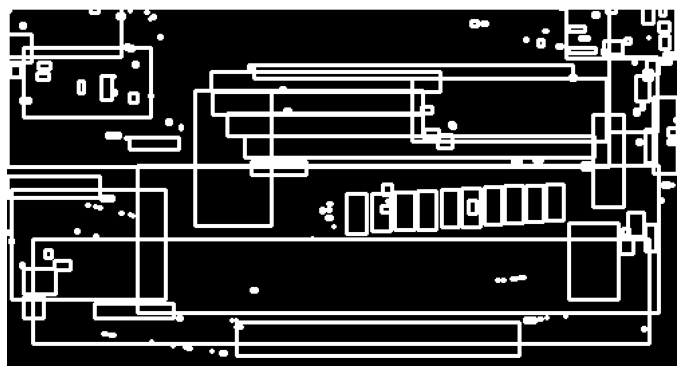

In [9]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    # insert to dict
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')
plt.savefig('Car-Boxes.png',bbox_inches = 'tight')
plt.show()

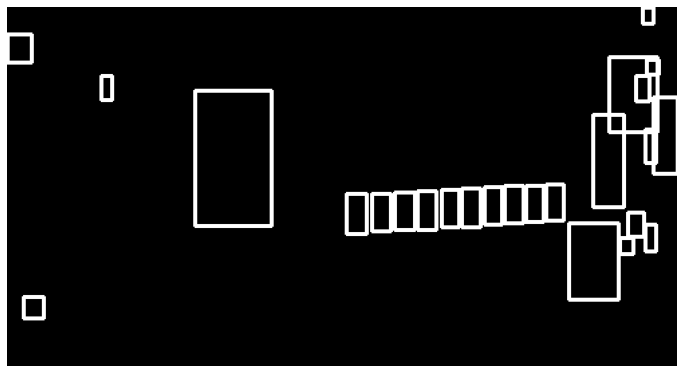

In [10]:
MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)
        
# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
#     cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')
plt.savefig('Car-Boxes-byCharSize.png',bbox_inches = 'tight')
plt.show()

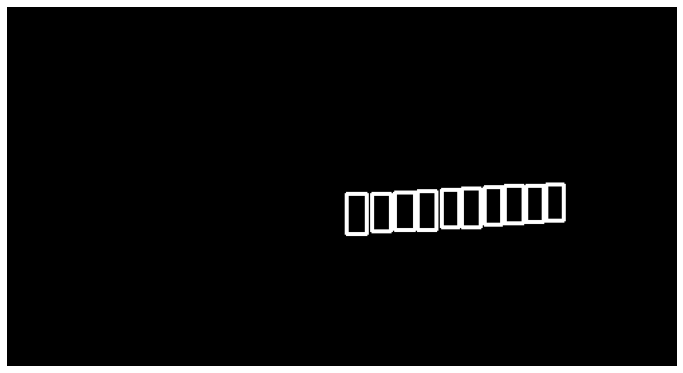

In [11]:
MAX_DIAG_MULTIPLYER = 5 # 5
MAX_ANGLE_DIFF = 12.0 # 12.0
MAX_AREA_DIFF = 0.5 # 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3 # 3

def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        # recursive
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        #cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')
plt.savefig('Car-Boxes-byContourArrangement.png',bbox_inches = 'tight')
plt.show()

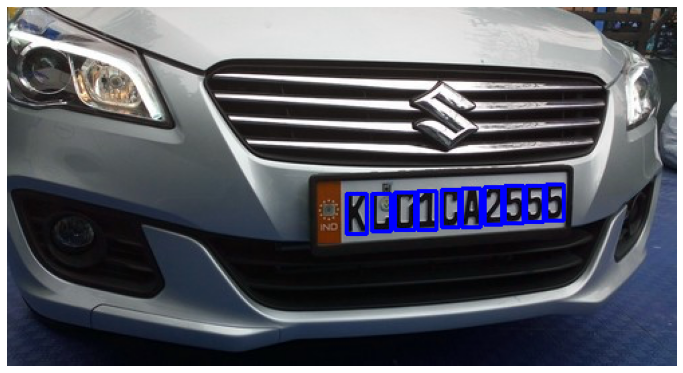

In [12]:
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        #cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(image2, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(0, 0, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.savefig('Car-OverlappingBoxes.png',bbox_inches = 'tight')
plt.show()

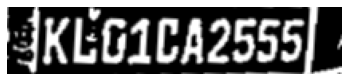

In [13]:
PLATE_WIDTH_PADDING = 1.3 # 1.3
PLATE_HEIGHT_PADDING = 1.5 # 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy))
    )
    
    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
        continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })
    
    plt.subplot(len(matched_result), 1, i+1)
    plt.imshow(img_cropped, cmap='gray')
    plt.axis('off')
    plt.savefig('Car-Plates(Rotated).png',bbox_inches = 'tight')
    plt.show()

###  But for us annotations are already provided hance finding rectangle box using annotations xmls 

In [14]:
plate_folder_path = '/content/gdrive/MyDrive/car_cnn/annotations'

plate_name_list = list()
for plate_file in os.listdir(plate_folder_path):
    full_path = os.path.join(plate_folder_path, plate_file)
    plate_name_list.append(full_path)
plate_name_list = sorted(plate_name_list, key=lambda x: int(x.split('/')[-1].split('.')[0][4:]))   

resized_plate_location_list = list()
for full_path in plate_name_list:
    xml_file = open(full_path, 'r')
    bs = BeautifulSoup(xml_file, "xml")
    
    width = int(bs.find('width').text)
    height = int(bs.find('height').text)
    
    xMax = int(bs.find('xmax').text) * (IMAGE_RESIZE_X / width)
    xMin = int(bs.find('xmin').text) * (IMAGE_RESIZE_X / width)
    yMax = int(bs.find('ymax').text) * (IMAGE_RESIZE_Y / height)
    yMin = int(bs.find('ymin').text) * (IMAGE_RESIZE_Y / height)
    resized_plate_location_list.append([int(xMax), int(xMin), int(yMax), int(yMin)])
    
print('Read in {} resized plate info'.format(len(plate_name_list)))

Read in 433 resized plate info


In [15]:
print (resized_plate_location_list)

[[167, 90, 129, 93], [131, 67, 129, 103], [135, 114, 96, 88], [130, 71, 139, 113], [170, 52, 144, 46], [121, 113, 162, 147], [149, 44, 127, 60], [103, 83, 110, 101], [121, 81, 115, 89], [123, 74, 148, 134], [151, 70, 131, 4], [136, 65, 153, 135], [138, 61, 165, 116], [121, 95, 126, 109], [137, 47, 144, 104], [186, 155, 128, 109], [31, 18, 168, 158], [175, 153, 153, 140], [159, 123, 160, 147], [110, 74, 193, 162], [24, 9, 124, 110], [127, 95, 127, 109], [130, 103, 77, 69], [106, 71, 141, 115], [120, 83, 147, 134], [108, 88, 141, 123], [160, 129, 189, 163], [122, 74, 141, 112], [199, 180, 180, 172], [105, 71, 139, 114], [100, 77, 151, 140], [200, 143, 172, 141], [125, 100, 111, 99], [153, 47, 150, 49], [130, 73, 124, 109], [68, 45, 155, 139], [114, 81, 122, 102], [123, 73, 121, 85], [124, 87, 115, 98], [164, 112, 142, 120], [158, 130, 187, 165], [105, 72, 103, 91], [108, 88, 141, 124], [135, 60, 119, 82], [194, 8, 163, 92], [140, 102, 139, 82], [176, 94, 140, 109], [24, 3, 107, 95], [143

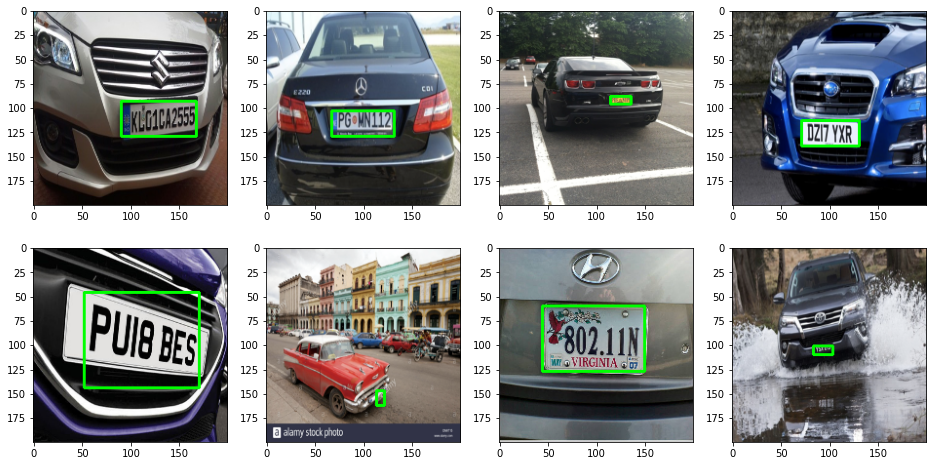

In [16]:
plt.figure(figsize=(16,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    
    # locate the plate location based on label
    top_left = (resized_plate_location_list[i][1], resized_plate_location_list[i][3])
    bottom_right = (resized_plate_location_list[i][0], resized_plate_location_list[i][2])
    
    # draw bounding box on the copy of resized car image so that we have original image to train with
    car_image_copy = resized_car_images_list[i].copy()
    
    # display the car image with plate around
    cv2.rectangle(car_image_copy, top_left, bottom_right, color=(0, 255, 0), thickness=2)
    plt.imshow(cv2.cvtColor(car_image_copy, cv2.COLOR_BGR2RGB))

In [17]:
def splitTrainTestSet():
  # X would be the array representation of resized car image
  # y would be the plate location 

  resized_car_images_list_np = np.array(resized_car_images_list)
  resized_plate_location_list_np = np.array(resized_plate_location_list)

  # normalization
  normalized_X = resized_car_images_list_np/255 # make all pixel color ranges from 0 to 1 instead of 0 to 255
  normalized_y = resized_plate_location_list_np/200

  X_train, X_test, y_train, y_test = train_test_split(normalized_X, normalized_y, test_size=0.1, random_state=7)
  
  return X_train, X_test, y_train, y_test 

In [18]:
def setupModel(modelType):
  cnn = keras.models.Sequential()

  if modelType == 'VGG16':
    cnn.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_RESIZE_X, IMAGE_RESIZE_Y, 3)))
    cnn.add(keras.layers.Dropout(0.1))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dense(64, activation="relu"))

    # we want the output with 4 points which are the four corners of the plate
    cnn.add(Dense(4, activation="sigmoid"))

    #cnn.layers[-6].trainable = False
  
  elif modelType == 'cnn':
    cnn.add(keras.layers.Conv2D(filters=16, kernel_size=5, input_shape=(IMAGE_RESIZE_X,IMAGE_RESIZE_Y,3), padding='same'))
    cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    cnn.add(keras.layers.Dropout(0.1))
    cnn.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same'))
    cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    cnn.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same'))
    cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    cnn.add(keras.layers.Dropout(0.1))
    cnn.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same'))
    cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    cnn.add(Flatten())

    # fully connected layer
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dense(64, activation="relu"))

    # we want the output with 4 points which are the four corners of the plate
    cnn.add(keras.layers.Dense(4, activation="sigmoid"))

  return cnn

In [19]:
import keras
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

cnn = setupModel(modelType='VGG16')
cnn.summary()

X_train, X_test, y_train, y_test  = splitTrainTestSet()


58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 6, 6, 512)         0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                         

In [20]:
cnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

train = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=20, verbose=1)  

Epoch 1/20
20/20 [==============================] - 405s 20s/step - loss: 0.0470 - accuracy: 0.3625 - val_loss: 0.0294 - val_accuracy: 0.5455
Epoch 2/20
20/20 [==============================] - 406s 20s/step - loss: 0.0280 - accuracy: 0.5090 - val_loss: 0.0296 - val_accuracy: 0.5455
Epoch 3/20
20/20 [==============================] - 410s 20s/step - loss: 0.0273 - accuracy: 0.5656 - val_loss: 0.0267 - val_accuracy: 0.5682
Epoch 4/20
20/20 [==============================] - 406s 20s/step - loss: 0.0247 - accuracy: 0.6170 - val_loss: 0.0245 - val_accuracy: 0.5682
Epoch 5/20
20/20 [==============================] - 407s 20s/step - loss: 0.0214 - accuracy: 0.6530 - val_loss: 0.0175 - val_accuracy: 0.6818
Epoch 6/20
20/20 [==============================] - 408s 20s/step - loss: 0.0180 - accuracy: 0.7481 - val_loss: 0.0196 - val_accuracy: 0.7273
Epoch 7/20
20/20 [==============================] - 409s 20s/step - loss: 0.0167 - accuracy: 0.7352 - val_loss: 0.0155 - val_accuracy: 0.7045
Epoch 

In [21]:
# Test
scores = cnn.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 72.73%


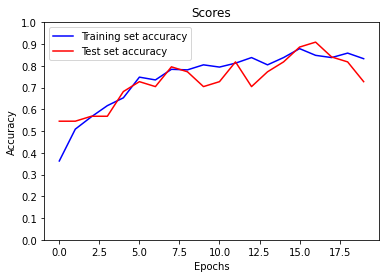

In [22]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training set accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Test set accuracy')
plt.title('Scores')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yticks(np.linspace(0, 1, 11))

plt.legend()
plt.show()

### read in car images and resize

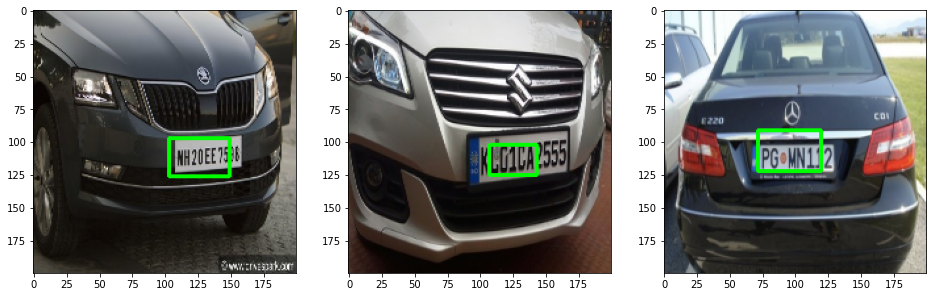

In [23]:
test_image_folder = '/content/gdrive/MyDrive/car_cnn/'
test_image_list = ['opencv_car.jpg','Cars0.png','Cars1.png']
resized_test_image_list = list()
orginal_test_image_list = list()
test_image_orginal_size = list()
for test_image in test_image_list:
    full_path = os.path.join(test_image_folder, test_image)
    car_image = cv2.imread(full_path)
    orginal_test_image_list.append(car_image)
    test_image_orginal_size.append(car_image.shape)
    car_resize_image = cv2.resize(car_image, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))
    resized_test_image_list.append(np.array(car_resize_image))

resized_test_image_list = np.array(resized_test_image_list)
# normalization
# this is important because our cnn network takes normalized input
resized_test_image_list = resized_test_image_list / 255

# make prediction
plate_location = cnn.predict(resized_test_image_list)
    
# plot the result
plt.figure(figsize=(16,8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    
    # draw bounding box on the copy of resized car image so that we have original image to train with
    car_image_copy = resized_test_image_list[i].copy()
    car_image_copy = car_image_copy * 255 # get original car image size
    car_image_copy = car_image_copy.astype('uint8') # cast to uint8 so that we can plot with normal RGB color
    
    # locate the plate location based on label
    # the output of the cnn is still normalized output, so we need to get the original dimension
    top_left = (int(plate_location[i][1] * 200), int(plate_location[i][3] * 200))
    bottom_right = (int(plate_location[i][0] * 200), int(plate_location[i][2] * 200))

    # display the car image with plate
    cv2.rectangle(car_image_copy, top_left, bottom_right, color=(0, 255, 0), thickness=2)
    plt.imshow(cv2.cvtColor(car_image_copy, cv2.COLOR_BGR2RGB))

### Get the location of the detected plate in original image size

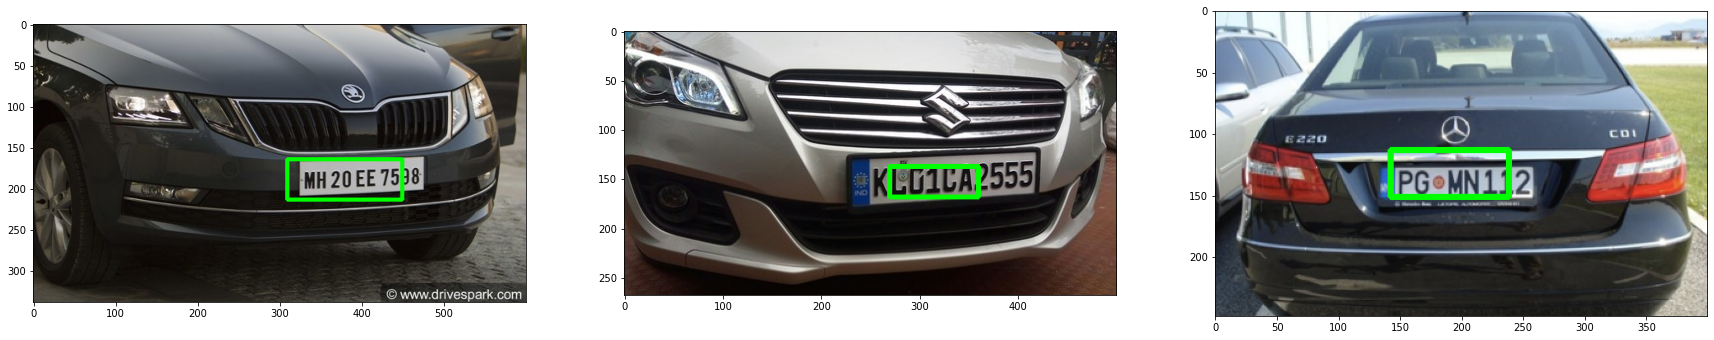

In [24]:

plate_location_origianl_scale = list()
for i in range(len(test_image_orginal_size)):
  # this is the location before normalization
  plate_location_resized = plate_location[i] * 200
  test_image_size = test_image_orginal_size[i]
  height, width = test_image_size[0], test_image_size[1]

  original_xMax = plate_location_resized[0] * (width / IMAGE_RESIZE_X)
  original_xMin = plate_location_resized[1] * (width / IMAGE_RESIZE_X)
  original_yMax = plate_location_resized[2] * (height / IMAGE_RESIZE_Y)
  original_yMin = plate_location_resized[3] * (height / IMAGE_RESIZE_Y)
  plate_location_origianl_scale.append([int(original_xMax), int(original_xMin), int(original_yMax), int(original_yMin)])

# plot the detected plate with car in the orginal images
plt.figure(figsize=(30,10))
for i in range(len(orginal_test_image_list)):
  plt.subplot(1, len(orginal_test_image_list), i+1)

  # copy the original image so that the original image stays unchanged
  image_copy = orginal_test_image_list[i].copy()

  # locate the corner of the plate
  top_left = (plate_location_origianl_scale[i][1], plate_location_origianl_scale[i][3])
  bottom_right = (plate_location_origianl_scale[i][0], plate_location_origianl_scale[i][2])

  # display plates
  cv2.rectangle(image_copy, top_left, bottom_right, color=(0, 255, 0), thickness=3)
  plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))

### Increase the size of the bounding box

338 600
1.1340614727448335 1.2360872676112742


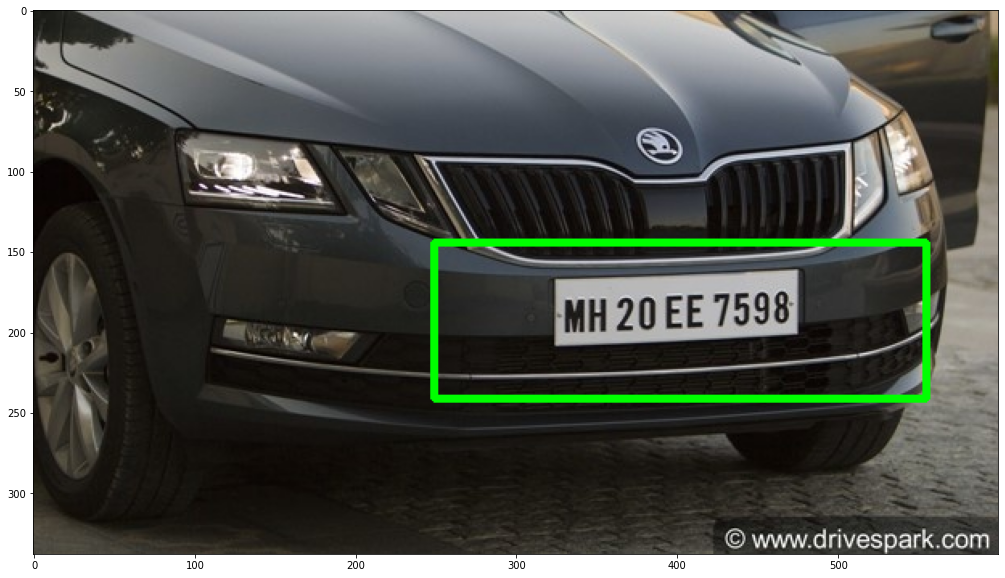

In [25]:
# since the CNN can not predict the plate location with 100% accuracy, we can enlarge
# the size of the bounding box so that it(hopefully) covers the complete plate
plate_image_list = list()

# plot the detected plate with car in the orginal images
plt.figure(figsize=(30,10))
i = 0
#for i in range(len(orginal_test_image_list)):
  #plt.subplot(1, len(orginal_test_image_list), i+1)

  # copy the original image so that the original image stays unchanged
image_copy = orginal_test_image_list[i].copy()

image_size = test_image_orginal_size[i]
image_height = image_size[0]
image_width = image_size[1]

print(image_height, image_width)

box_image_ratio_height = (plate_location_origianl_scale[i][2] - plate_location_origianl_scale[i][3]) / image_height
box_image_ratio_width = (plate_location_origianl_scale[i][0] - plate_location_origianl_scale[i][1]) / image_width

height_coef = 1 + ((1 / (np.log(box_image_ratio_height))**2) / 2)
width_coef = 1 + ((1 / (np.log(box_image_ratio_width))**2) / 2)
print(height_coef, width_coef)

  # locate the corner of the plate
top_left = (int(plate_location_origianl_scale[i][1] / width_coef), int(plate_location_origianl_scale[i][3] / height_coef))
bottom_right = (int(plate_location_origianl_scale[i][0] * width_coef), int(plate_location_origianl_scale[i][2] * height_coef))

  # display plates
cv2.rectangle(image_copy, top_left, bottom_right, color=(0, 255, 0), thickness=3)
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
  
plate_image = orginal_test_image_list[i][top_left[1]:bottom_right[1], top_left[0]:bottom_right[0],:]
plate_image_list.append(plate_image)

### Read the plate and display results

In [26]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 50 kB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


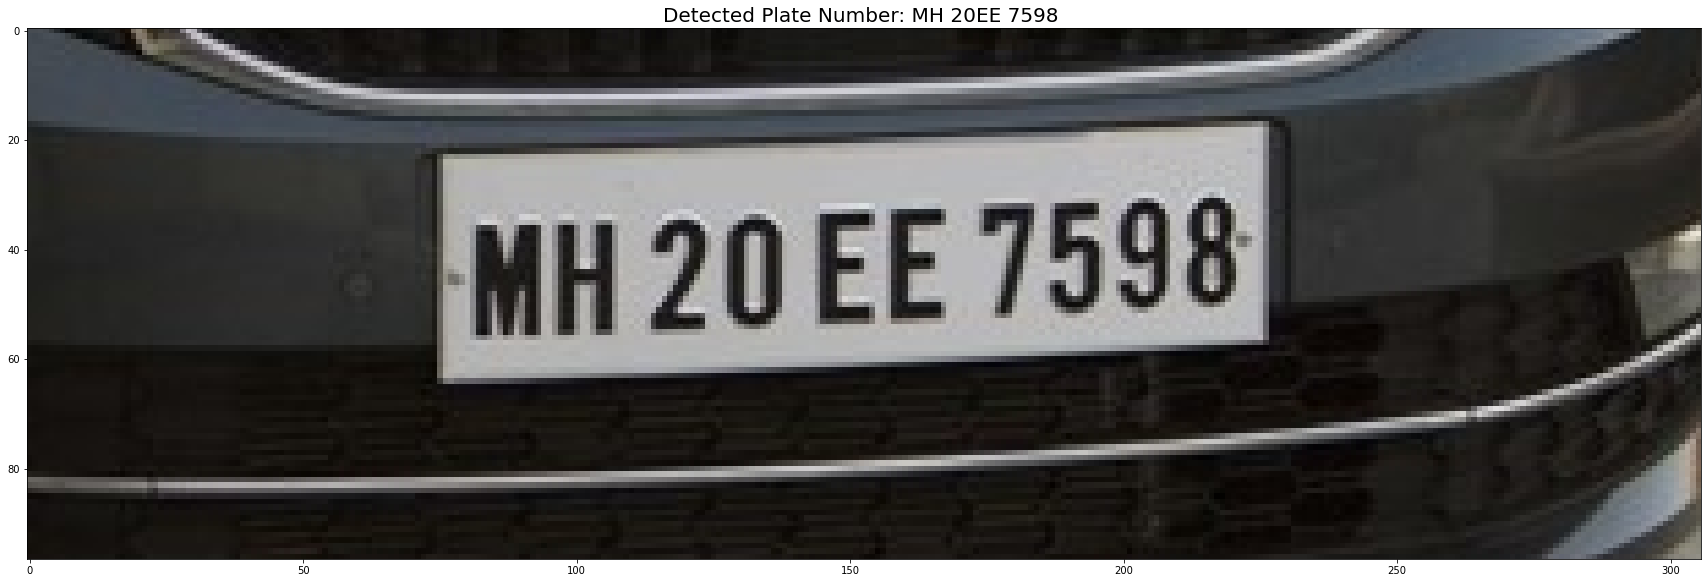

In [27]:
import easyocr

# set up the easyocr reader with english
reader = easyocr.Reader(['en'])

# display the plates with detected text
plt.figure(figsize=(30,10))
for i, plate in enumerate(plate_image_list):
  plt.subplot(1, len(plate_image_list), i+1)
  plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))

  bounds = reader.readtext(plate)
  title_text = ''
  for text in bounds:
    title_text += text[1] + ' '
  plt.title('Detected Plate Number: ' + title_text, fontdict={'fontsize':20})